# LOADING THE DATASET

In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
import seaborn as sns

In [40]:
data = pd.read_csv('data/indian_pharmaceutical_products_clean.csv')

In [41]:
data.head(5)

,product_id,brand_name,manufacturer,price_inr,is_discontinued,dosage_form,pack_size,pack_unit,num_active_ingredients,primary_ingredient,primary_strength,active_ingredients,therapeutic_class,packaging_raw,manufacturer_raw
0,1,Augmentin 625 Duo Tablet,Glaxo SmithKline Pharmaceuticals Ltd,223.42,False,tablet,10.0,strip,2,Amoxycillin,500mg,"[{'name': 'Amoxycillin', 'strength': '500mg', ...",antibiotic,strip of 10 tablets,Glaxo SmithKline Pharmaceuticals Ltd
1,2,Azithral 500 Tablet,Alembic Pharmaceuticals Ltd,132.36,False,tablet,5.0,strip,1,Azithromycin,500mg,"[{'name': 'Azithromycin', 'strength': '500mg',...",antibiotic,strip of 5 tablets,Alembic Pharmaceuticals Ltd
2,3,Ascoril LS Syrup,Glenmark Pharmaceuticals Ltd,118.00,False,syrup,100.0,bottle,2,Ambroxol,30mg/5ml,"[{'name': 'Ambroxol', 'strength': '30mg/5ml', ...",bronchodilator,bottle of 100 ml Syrup,Glenmark Pharmaceuticals Ltd
3,4,Allegra 120mg Tablet,Sanofi India Ltd,218.81,False,tablet,10.0,strip,1,Fexofenadine,120mg,"[{'name': 'Fexofenadine', 'strength': '120mg',...",antihistamine,strip of 10 tablets,Sanofi India Ltd
4,5,Avil 25 Tablet,Sanofi India Ltd,10.96,False,tablet,15.0,strip,1,Pheniramine,25mg,"[{'name': 'Pheniramine', 'strength': '25mg', '...",other,strip of 15 tablets,Sanofi India Ltd


In [42]:
data.tail(5)

,product_id,brand_name,manufacturer,price_inr,is_discontinued,dosage_form,pack_size,pack_unit,num_active_ingredients,primary_ingredient,primary_strength,active_ingredients,therapeutic_class,packaging_raw,manufacturer_raw
253968,253969,Ziyapod 100mg Oral Suspension,Ziyana Lifesciences Pvt Ltd,62.3,False,suspension,30.0,bottle,1,Cefpodoxime Proxetil,100mg,"[{'name': 'Cefpodoxime Proxetil', 'strength': ...",other,bottle of 30 ml Oral Suspension,Ziyana Lifesciences Pvt Ltd
253969,253970,Zemhart 30mg Tablet,Leeford Healthcare Ltd,54.0,False,tablet,10.0,strip,1,Diltiazem,30mg,"[{'name': 'Diltiazem', 'strength': '30mg', 'fu...",other,strip of 10 tablets,Leeford Healthcare Ltd
253970,253971,Zivex 25mg Tablet,Euro Organics,57.0,False,tablet,10.0,strip,1,Hydroxyzine,25mg,"[{'name': 'Hydroxyzine', 'strength': '25mg', '...",other,strip of 10 tablets,Euro Organics
253971,253972,ZI Fast 500mg Injection,Burgeon Health Series Private Limited,152.0,False,injection,NaN,NaN,1,Azithromycin,500mg,"[{'name': 'Azithromycin', 'strength': '500mg',...",antibiotic,vial of 1 Injection,Burgeon Health Series Private Limited
253972,253973,Zyvocol 1% Dusting Powder,GBK Healthcare,110.0,False,powder,75.0,gm,1,Clotrimazole,NaN,"[{'name': 'Clotrimazole', 'strength': None, 'f...",other,bottle of 75 gm Dusting Powder,GBK Healthcare


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   product_id              253973 non-null  int64  
 1   brand_name              253973 non-null  object 
 2   manufacturer            253973 non-null  object 
 3   price_inr               253973 non-null  float64
 4   is_discontinued         253973 non-null  bool   
 5   dosage_form             253973 non-null  object 
 6   pack_size               231643 non-null  float64
 7   pack_unit               231643 non-null  object 
 8   num_active_ingredients  253973 non-null  int64  
 9   primary_ingredient      253973 non-null  object 
 10  primary_strength        228775 non-null  object 
 11  active_ingredients      253973 non-null  object 
 12  therapeutic_class       253973 non-null  object 
 13  packaging_raw           253973 non-null  object 
 14  manufacturer_raw    

In [44]:
data.isnull().sum()

product_id                    0
brand_name                    0
manufacturer                  0
price_inr                     0
is_discontinued               0
dosage_form                   0
pack_size                 22330
pack_unit                 22330
num_active_ingredients        0
primary_ingredient            0
primary_strength          25198
active_ingredients            0
therapeutic_class             0
packaging_raw                 0
manufacturer_raw              0
dtype: int64

# DATA CLEANING

##### we have missing values in pack_size, pack_unit and primary_strength


In [45]:
data['pack_size'].value_counts()

pack_size
10.0     155077
30.0      12281
15.0       9525
100.0      8334
60.0       7719
          ...  
122.0         1
340.0         1
119.0         1
22.0          1
165.0         1
Name: count, Length: 91, dtype: int64

<Axes: xlabel='pack_size', ylabel='Count'>

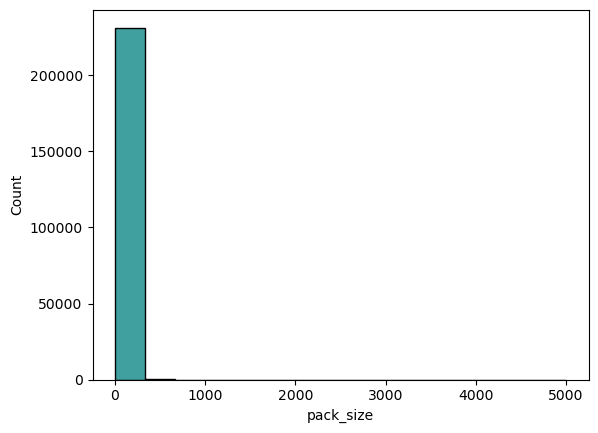

In [46]:
sns.histplot(x = 'pack_size', color = 'teal', bins = 15, data = data)

In [47]:
# pack size does not have no skwness therefore we replace nan values with mean
data['pack_size'].fillna(data['pack_size'].mean(skipna=True), inplace=True)

<Axes: xlabel='pack_unit', ylabel='Count'>

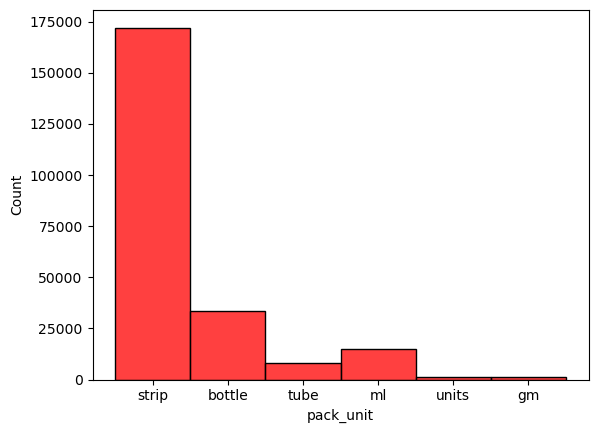

In [48]:
sns.histplot(x = 'pack_unit', color = 'red', bins = 15, data = data)

In [49]:
data['pack_unit'].value_counts()

pack_unit
strip     172122
bottle     33772
ml         14790
tube        8241
units       1424
gm          1294
Name: count, dtype: int64

In [50]:
data['pack_unit'].unique()

array(['strip', 'bottle', 'tube', nan, 'ml', 'units', 'gm'], dtype=object)

In [51]:
mapping = { 'strip' : 0,
           'bottle' : 1,
           'tube' : 2,
           'ml' : 3,
           'units' : 4,
           'gm' : 5 }

data['pack_unit'] = data['pack_unit'].map(mapping)

In [52]:
data['pack_unit'].unique()

array([ 0.,  1.,  2., nan,  3.,  4.,  5.])

In [53]:
# there is right skwness in the graph so we impute median
data['pack_unit'].fillna(data['pack_unit'].median(skipna=True), inplace=True)

In [54]:
data['pack_unit'].value_counts()

pack_unit
0.0    194452
1.0     33772
3.0     14790
2.0      8241
4.0      1424
5.0      1294
Name: count, dtype: int64

In [55]:
data['primary_strength'].unique()

array(['500mg', '30mg/5ml', '120mg', '25mg', '10mg', '5mg', '150mg',
       '5mg/5ml', nan, '200mg', '15mg/5ml', '180mg', '400mg', '2mg/5ml',
       '0.25mg', '2mg', '90mg', '1mg', '100mg', '0.5mg', '200mg/5ml',
       '400mg/5ml', '50mg', '2.5mg', '22.75mg', '7.5mg/ml', '24mg',
       '12.5mg', '1000mg', '300mg', '40mg', '75mg', '875mg', '6mg',
       '250mg', '60mg', '450mg', '20mg', '4mg', '30mg', '325mg', '7.5mg',
       '0.2mg', '900mg', '20mg/5ml', '0.6mg', '49mg', '2.5mg/5ml',
       '800mg', '20mg/ml', '100mg/5ml', '3mg', '600mg/5ml', '333mg',
       '300mg/5ml', '20%', '135mg', '0.5mg/5ml', '80mg', '125mg/5ml',
       '70mg', '12.5mg/5ml', '2.6mg', '2mg/ml', '97mg', '1250mg', '125mg',
       '10mg/ml', '1gm', '1mg/ml', '1100mg/5ml', '25mg/ml', '0.75gm',
       '1.5mg', '50mg/5ml', '5.6mg', '12mg/ml', '1.936gm', '16mg', '15mg',
       '170mg', '8mg', '750mg', '12mg', '1mg/5ml', '48mg', '45mg',
       '480mg', '18mg', '110mg', '4mg/5ml', '67mg', '2.5mg/ml', '6.5mg',
       '40mg

In [56]:
# Keep only rows with 'mg' values
data_mg = data[data['primary_strength'].str.contains('mg', na=False)]

# Extract just the number part using regex for it 
data_mg['strength_mg'] = data_mg['primary_strength'].str.extract(r'([\d\.]+)').astype(float)

In [57]:
# filling the nan values with median 
median_strength = data_mg['strength_mg'].median()
data['strength_mg'] = data_mg['strength_mg']
data['strength_mg'] = data['strength_mg'].fillna(median_strength)

In [58]:
# drop the primary strength column
data['primary_strength'] = data['primary_strength'].dropna()

In [59]:
mapping_discontinued = { False : 0,
                        True : 1}

data['is_discontinued'] = data['is_discontinued'].map(mapping_discontinued)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   product_id              253973 non-null  int64  
 1   brand_name              253973 non-null  object 
 2   manufacturer            253973 non-null  object 
 3   price_inr               253973 non-null  float64
 4   is_discontinued         253973 non-null  int64  
 5   dosage_form             253973 non-null  object 
 6   pack_size               253973 non-null  float64
 7   pack_unit               253973 non-null  float64
 8   num_active_ingredients  253973 non-null  int64  
 9   primary_ingredient      253973 non-null  object 
 10  primary_strength        228775 non-null  object 
 11  active_ingredients      253973 non-null  object 
 12  therapeutic_class       253973 non-null  object 
 13  packaging_raw           253973 non-null  object 
 14  manufacturer_raw    

In [61]:
data.drop('primary_strength', axis=1, inplace=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   product_id              253973 non-null  int64  
 1   brand_name              253973 non-null  object 
 2   manufacturer            253973 non-null  object 
 3   price_inr               253973 non-null  float64
 4   is_discontinued         253973 non-null  int64  
 5   dosage_form             253973 non-null  object 
 6   pack_size               253973 non-null  float64
 7   pack_unit               253973 non-null  float64
 8   num_active_ingredients  253973 non-null  int64  
 9   primary_ingredient      253973 non-null  object 
 10  active_ingredients      253973 non-null  object 
 11  therapeutic_class       253973 non-null  object 
 12  packaging_raw           253973 non-null  object 
 13  manufacturer_raw        253973 non-null  object 
 14  strength_mg         

# DATA VISUALIZATION

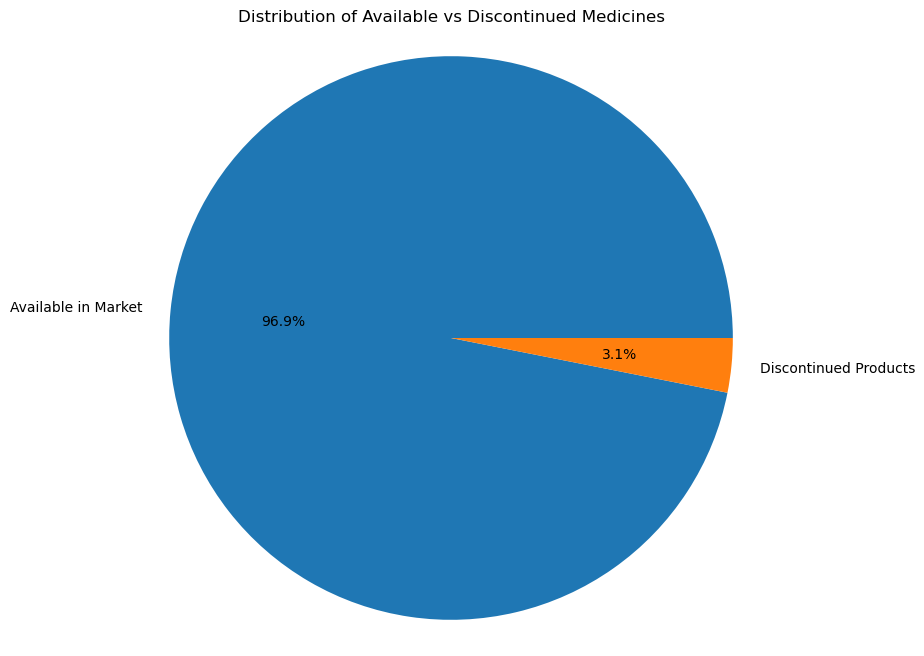

In [63]:
discontinued = data['is_discontinued'].value_counts()
# False = available, True = discontinued
labels = ['Available in Market', 'Discontinued Products']  

plt.figure(figsize=(8, 8))
plt.pie(discontinued.values, labels=labels, autopct='%1.1f%%' ,startangle=0)
plt.title('Distribution of Available vs Discontinued Medicines')
plt.axis('equal')
plt.show()

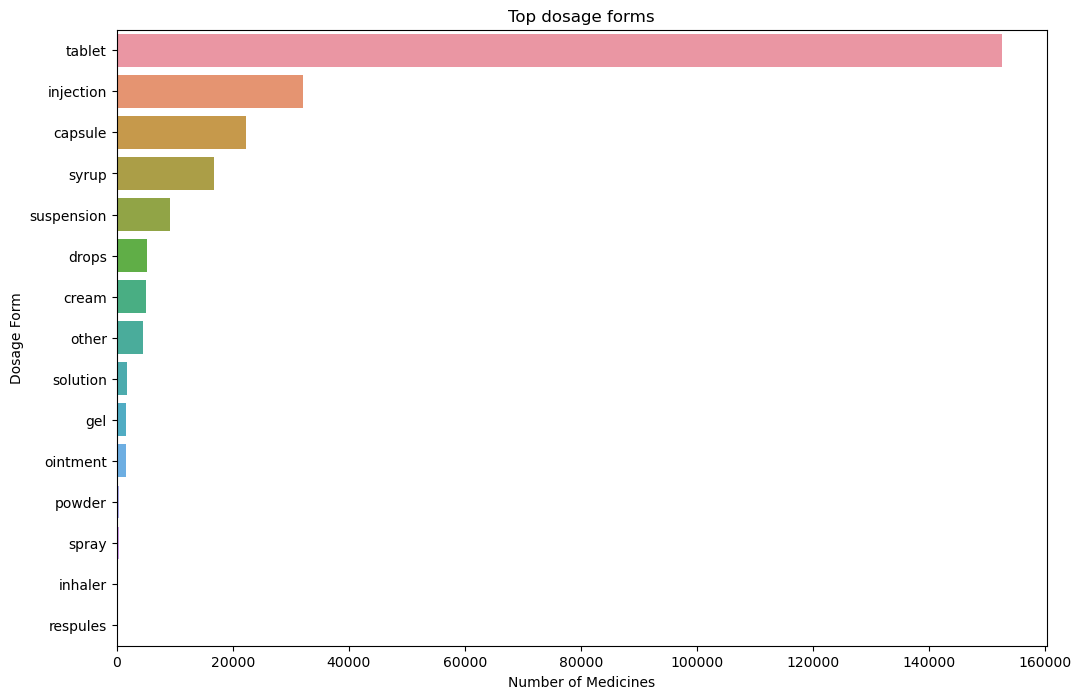

In [64]:
plt.figure(figsize=(12,8))
sns.barplot(x=data['dosage_form'].value_counts().values, y=data['dosage_form'].value_counts().index)
plt.title('Top dosage forms')
plt.xlabel('Number of Medicines')
plt.ylabel('Dosage Form')
plt.show()

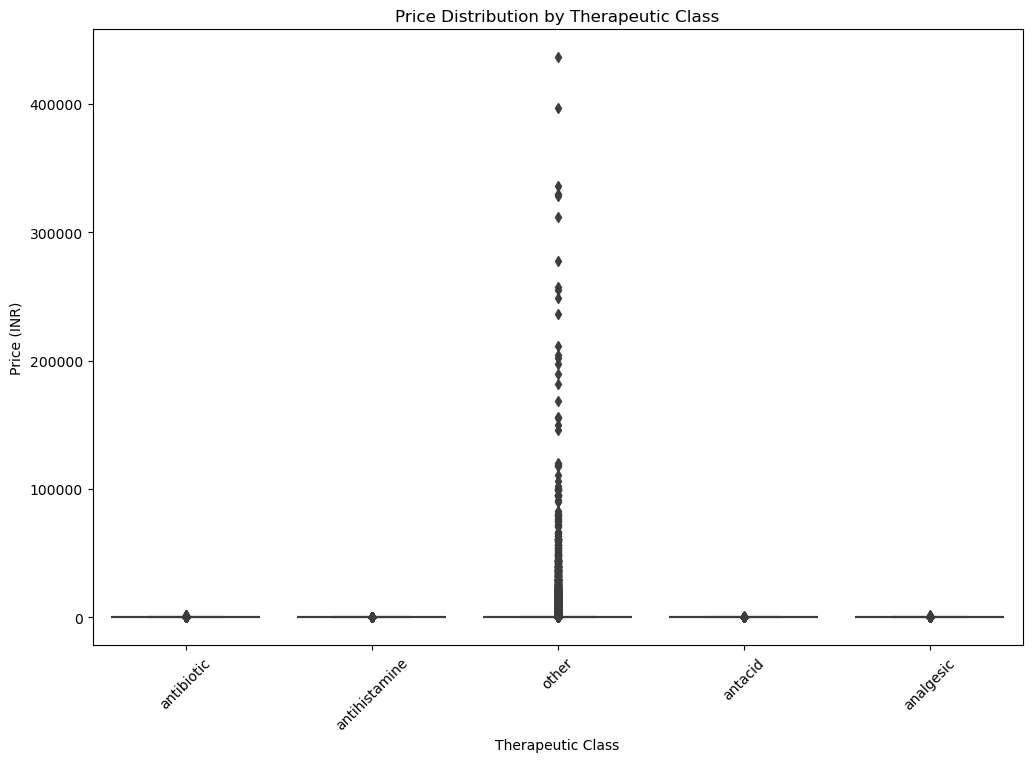

In [65]:
plt.figure(figsize=(12,8))
top_classes = data['therapeutic_class'].value_counts().head(5).index
filtered = data[data['therapeutic_class'].isin(top_classes)]

sns.boxplot(x='therapeutic_class', y='price_inr', data=filtered)
plt.title('Price Distribution by Therapeutic Class')
plt.xlabel('Therapeutic Class')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.show()


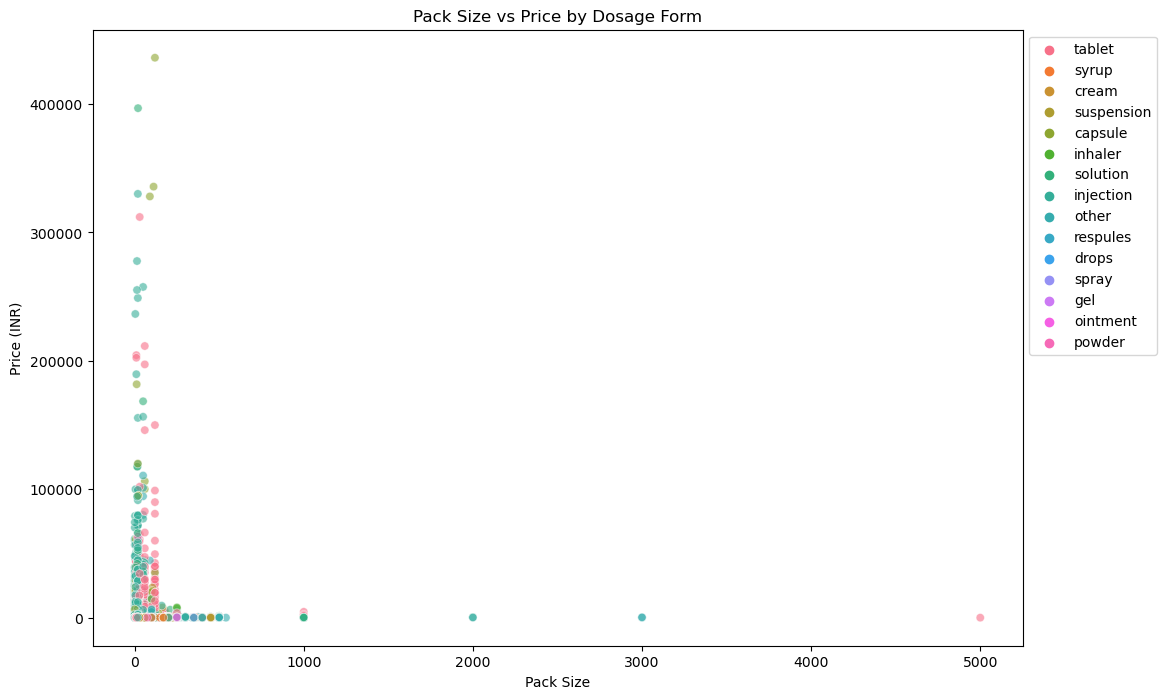

In [66]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='pack_size', y='price_inr', hue='dosage_form', data=data, alpha=0.6)
plt.title('Pack Size vs Price by Dosage Form')
plt.xlabel('Pack Size')
plt.ylabel('Price (INR)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [67]:
max_price = data['price_inr'].max()
min_price = data['price_inr'].min()
print("Max Price:", max_price)
print("Min Price:", min_price)

Max Price: 436000.0
Min Price: 0.0


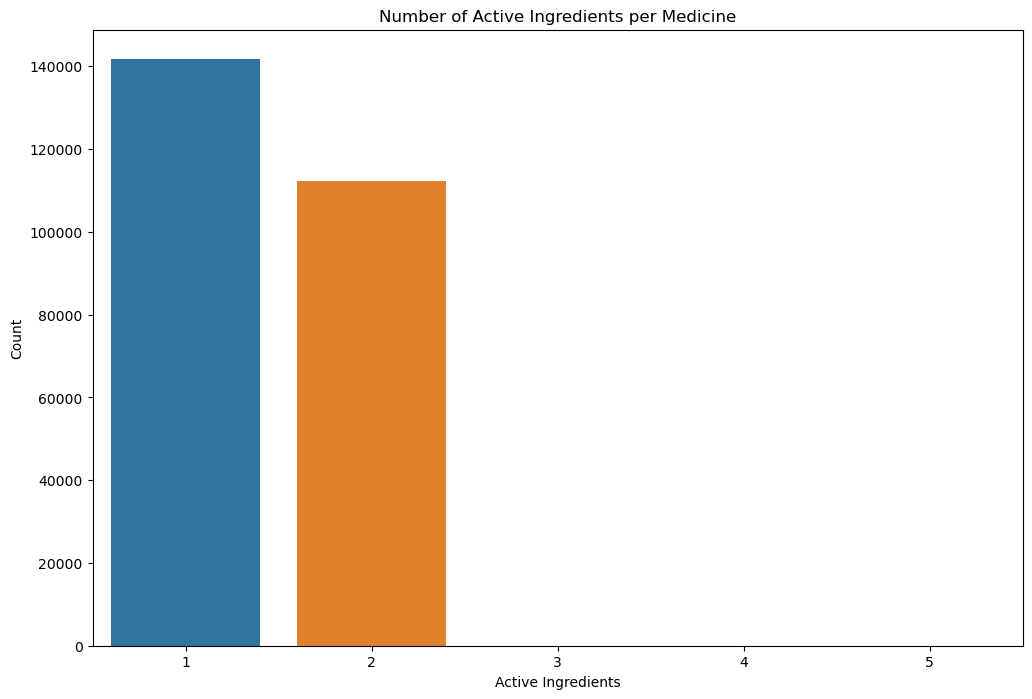

In [68]:
plt.figure(figsize=(12,8))
sns.countplot(x='num_active_ingredients', data=data)
plt.title('Number of Active Ingredients per Medicine')
plt.xlabel('Active Ingredients')
plt.ylabel('Count')
plt.show()


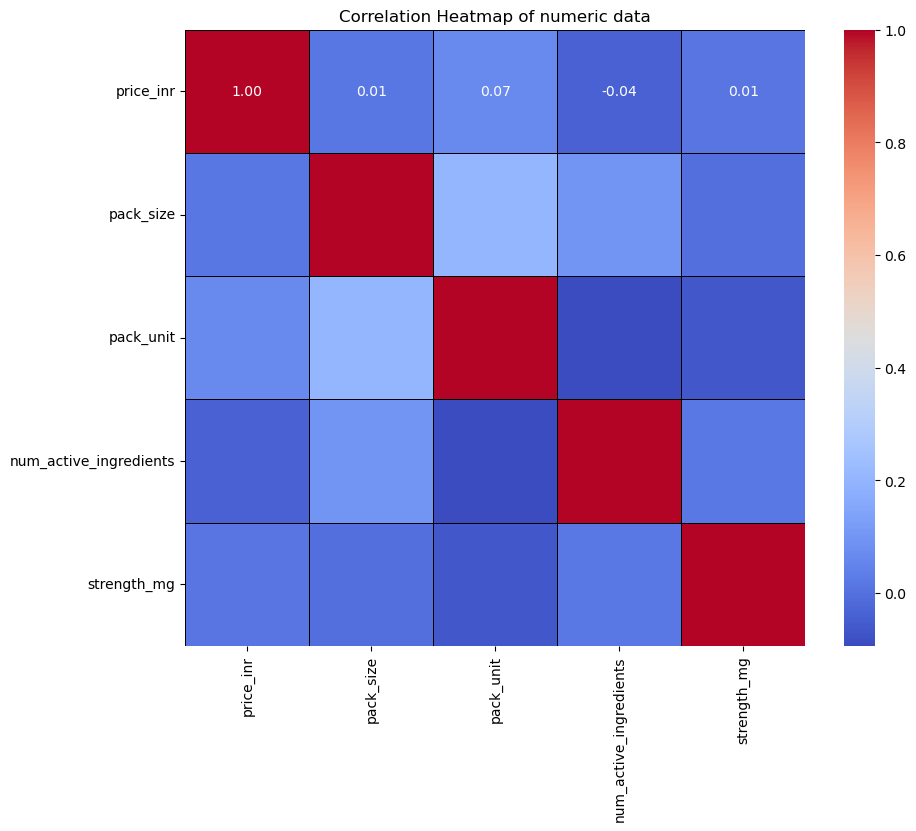

In [69]:
corr_matrix = data[['price_inr', 'pack_size', 'pack_unit', 'num_active_ingredients', 'strength_mg']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black', square=False)
plt.title('Correlation Heatmap of numeric data')
plt.show()

# MODEL EVALUATION

#### Evaluating using discountinued as target variable for classification

In [70]:
features = [
    'brand_name',
    'manufacturer',
    'price_inr',
    'dosage_form',
    'pack_size',
    'pack_unit',
    'num_active_ingredients',
    'primary_ingredient',
    'therapeutic_class',
    'strength_mg'
]

In [71]:
y = data['is_discontinued']

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

x = data[features].copy()
y = data['is_discontinued']

label_encoder = {}

for col in x.select_dtypes(include='object'):
    le = LabelEncoder()
    x[col] = LabelEncoder().fit_transform(x[col])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### random forest classifier


In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
print("Accuracy:", rf.score(x_test, y_test))
print(classification_report(y_test,predictions))

Accuracy: 0.9697804902057289
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     49187
           1       0.73      0.07      0.13      1608

    accuracy                           0.97     50795
   macro avg       0.85      0.54      0.56     50795
weighted avg       0.96      0.97      0.96     50795



###  XGBoost + SMOTE + GridSearchCV + threshold

In [74]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train_res, y_train_res)

y_pred = xgb_model.predict(x_test)

In [75]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

params = {
    'max_depth': [3, 5, 7],
    'n_estimators': [200, 1000],
    'learning_rate': [0.05, 0.1, 0.2],
    'scale_pos_weight': [1, 2, 5]  # Optional, even with SMOTE
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid = GridSearchCV(xgb, params, scoring='f1', cv=3)
grid.fit(x_train_res, y_train_res)  # Use SMOTE-resampled data

best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

In [76]:
# ➊ Get class‑1 probabilities
y_probs = best_model.predict_proba(x_test)[:, 1]

# ➋ Apply a 0.10 cut‑off instead of the default 0.50
threshold = 0.10
y_pred_1 = (y_probs >= threshold).astype(int)

# ➌ Evaluate
print("Accuracy:", rf.score(x_test, y_pred_1))
print(f"Results with threshold {threshold}:")
print(classification_report(y_test, y_pred_1))

Accuracy: 0.9206417954523083
Results with threshold 0.1:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     49187
           1       0.21      0.55      0.31      1608

    accuracy                           0.92     50795
   macro avg       0.60      0.74      0.63     50795
weighted avg       0.96      0.92      0.94     50795



#### Now evaluating using price as the target variable for regression

In [77]:
data['price_per_unit'] = data['price_inr'] / data['pack_size']

In [78]:
# Calculate 99th percentiles
price_inr_threshold = data['price_inr'].quantile(0.99)
ppu_threshold = data['price_per_unit'].quantile(0.99)

# Filter data
filtered_data = data[
    (data['price_inr'] <= price_inr_threshold) &
    (data['price_per_unit'] <= ppu_threshold)
]

In [79]:
filtered_data['price_per_unit'] = filtered_data['price_inr'] / filtered_data['pack_size']

In [80]:
features2 = [
    'dosage_form',
    'pack_size',
    'pack_unit',
    'num_active_ingredients',
    'strength_mg',
    'therapeutic_class',
    'manufacturer_raw',
    'price_per_unit'
]

In [81]:
# target variable
y = filtered_data['price_inr']

### random forest regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

x = filtered_data[features2].copy()
y = np.log1p(filtered_data['price_inr'])

label_encoders = {}
for col in x.select_dtypes(include='object'):
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [83]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [84]:
prediction_log = rf.predict(x_test)

y_pred = np.expm1(prediction_log)
y_true = np.expm1(y_test)

print("R2 Score: ", r2_score(y_true, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_true, y_pred)))

R2 Score:  0.9995264086729494
RMSE:  4.541106000573101
